In [12]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# Iris dataset
iris_dataset = load_iris()
print("Keys iris_dataset: \n{}".format(iris_dataset.keys()))



Keys iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
# Доступ к ключам
print("Ключи в датасете:", iris_dataset.keys())
print("Цели:", iris_dataset.target)
print("Названия целевых классов:", iris_dataset.target_names)
print("Название признаков:", iris_dataset.feature_names)
print("Описание:", iris_dataset.DESCR)
print("Форма массива data: {} ".format(iris_dataset['data'].shape))
print("Данные:", iris_dataset.data)

Ключи в датасете: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Цели: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Названия целевых классов: ['setosa' 'versicolor' 'virginica']
Название признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Описание: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
        

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_train: (112, 4)
Форма массива y_train: (112,)
Форма массива X_test: (38, 4)
Форма массива y_test: (38,)


In [15]:
iris_dataset_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataset_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


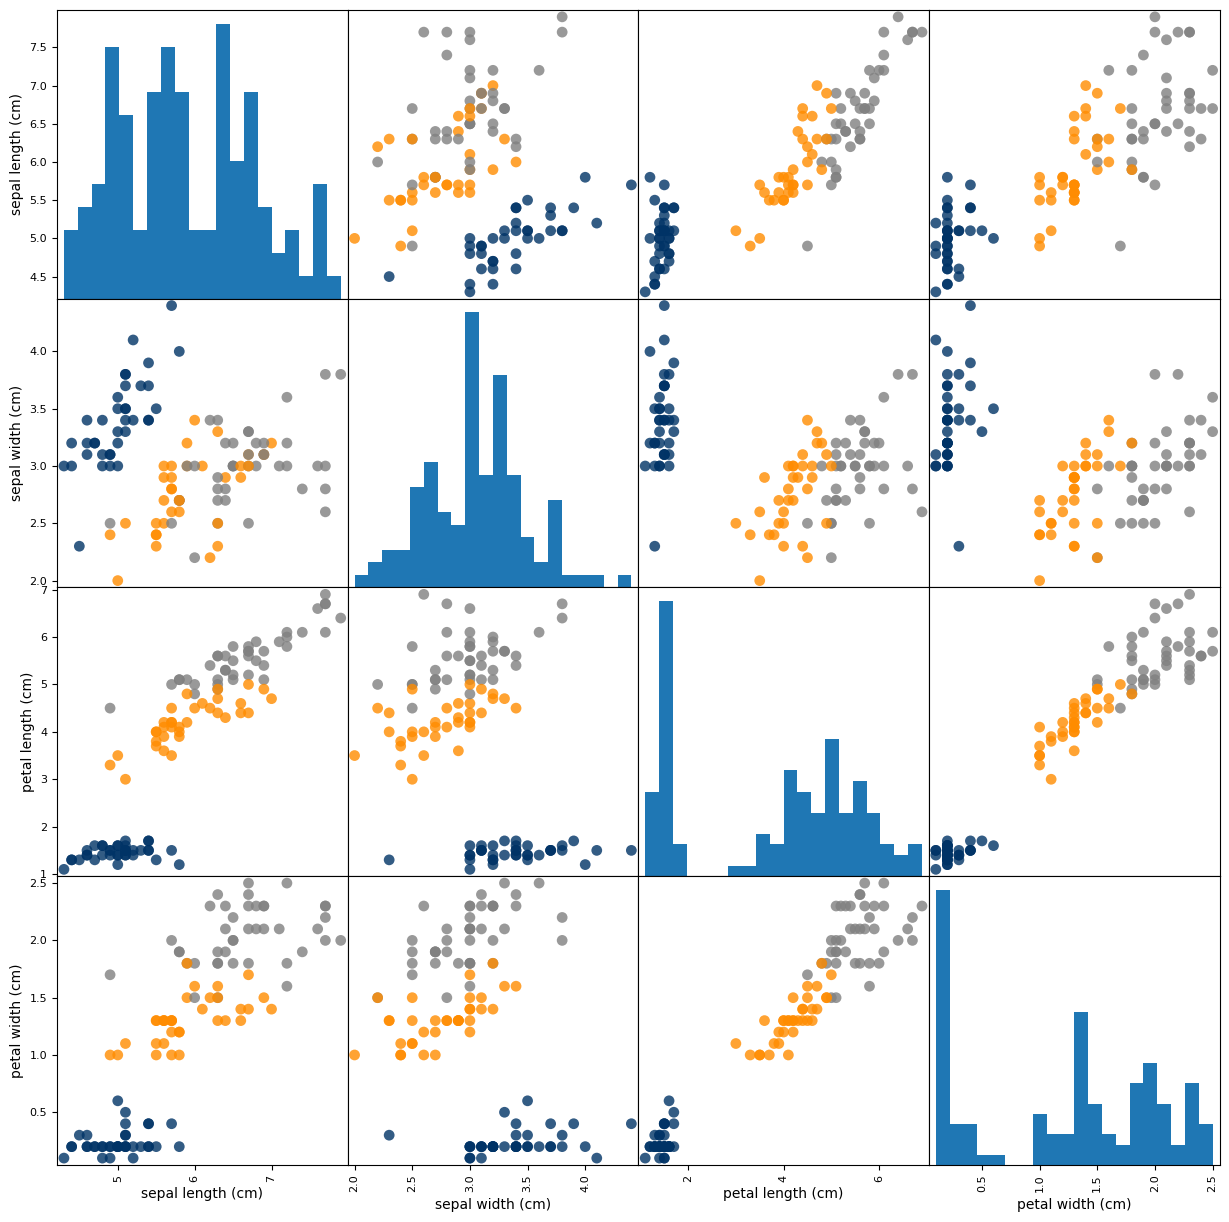

In [16]:

# Определение цветов для каждого класса
colors = ['#003366' if label == 0 else '#FF8C00' if label ==
          1 else '#808080' for label in y_train]

# Создание матрицы рассеяния с использованием point_colors
grr = pd.plotting.scatter_matrix(iris_dataset_dataframe, c=colors, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
X_new = np.array([[5,2.9,1,0.2]])
print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 4)


In [19]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Сгенерированная метка: {}".format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Сгенерированная метка: ['setosa']


In [20]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора: \n {}".format(y_pred))

Прогнозы для тестового набора: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [21]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе: 0.97


In [22]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


###### В результате была решена задача обучения с учителем.Было три возможных сорта ирисов – setosa, versicolor и virginica, что делало нашу задачу задачей 3-классовой классификации. В задаче классификации возможные сорта ирисов называются классами (classes) а сами названия сортов – метками (labels).Набор данных Iris состоит из двух массивов NumPy: один содержит данные и в scikit-learn обозначается как X, другой содержит правильные или нужные ответы и обозначается как y. Массив Х представляет собой двумерный массив признаков, в котором одна строка соответствует одной точке данных, а один столбец – одному признаку.Массив у представляет собой одномерный массив, который для каждого примера содержит метку класса, целое число от 0 до 2.Мы разделили наш набор данных на обучающий набор (training set), чтобы построить нашу модель, а также тестовый набор (test set), чтобы оценить, насколько хорошо наша модель будет классифицировать новые, ранее незнакомые ей данные.Мы выбрали алгоритм классификации k ближайших соседей, который генерирует прогноз для новой точки данных, рассматривая ее ближайшего соседа(ей) в обучающем наборе. Все это реализовано в классе KNeighborsClassifier, который содержит алгоритм, строящий модель, а также алгоритм, который дает прогнозы, используя построенную модель. Мы создали объект-экземпляр класса, задав параметры. Затем мы построили модель, вызвав метод fit и передав обучающие данные (X_train) и обучающие ответы (y_train) в качестве параметров. Мы оценили качество модели с использованием метода score, который вычисляет правильность модели. Мы применили метод score к тестовым данным и тестовым ответам и обнаружили, что наша модель демонстрирует правильность около 97%. Это означает, что модель выдает правильные прогнозы для 97% наблюдений тестового набора.Это убедило нас в том, что модель можно применить к новым данным (в нашем примере это измерения характеристик новых цветов), и мы надеемся, что эта модель даст правильные прогнозы в 97% случаев.
